In [1]:
#
# K-Nearest Neighbourhood Example ... 
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
nam = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=nam)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 5)

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
type(y)

numpy.ndarray

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler
print(X_test)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[5.8 4.  1.2 0.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2. ]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [7.1 3.  5.9 2.1]
 [6.4 3.2 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.6 3.  4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [5.  3.2 1.2 0.2]
 [5.5 2.6 4.4 1.2]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.  3.5 1.3 0.3]
 [7.2 3.2 6.  1.8]
 [5.7 2.8 4.1 1.3]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.7 1.2]
 [6.3 2.5 5.  1.9]]
[[-0.04622511  2.3720024  -1.48043619 -1.31466572]
 [-0.89033581 -1.240184   -0.4597716  -0.15276803]
 [ 0.91847283 -0.03612186  0.33407864  0.2345312 ]
 [-0.52857408  2.13118998 -1.4237326  -1.05646624]
 [ 2.48610699  1.89037755  1.46815041  1.00912966]
 [ 0.5567111   0.68631542  0.50418941  0.49273069]
 [ 1.28023456  0.20469056  0.73100376  1.39642889]
 [-0.89033581  1.89037755 -1.08351107 -1.05646624]
 [-1.37268478  0.4455

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:

xx =[ 4 , 3 , 2 , 0.3 , 5 , 3.6 , 1.4 , 1.2]
XX = np.array(xx)
XX = np.reshape(XX,(2,4))
XX = scaler.transform(XX)
print( len(xx) , XX.shape , type(XX) ) 
print('\n\n==> ',classifier.predict(XX))


8 (2, 4) <class 'numpy.ndarray'>


==>  ['Iris-setosa' 'Iris-setosa']


In [11]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

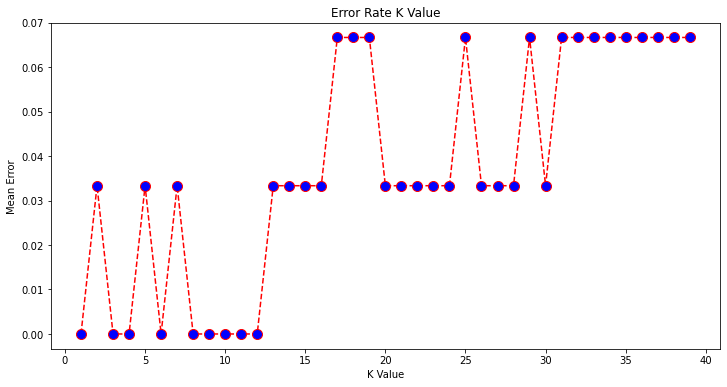

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [14]:
150 **(0.33)

5.225286594934329

In [15]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [16]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

